In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('D:/marketing/data.xlsx')
df

,날짜,실시간비율,실시간량,실검비율,실검량
0,2021-02-25,100.00000,605624,100.00000,86899
1,2021-02-26,34.85076,211065,29.01214,25211
2,2021-02-27,17.63669,106812,14.48414,12587
3,2021-02-28,15.53354,94075,12.69096,11028
4,2021-03-01,16.45141,99634,13.12000,11401
...,...,...,...,...,...
800,2023-05-06,0.25251,1531,0.17540,153
801,2023-05-07,0.24853,1507,0.20266,177
802,2023-05-08,0.80667,4892,0.62222,542
803,2023-05-09,0.89570,5432,3.45600,3010


In [5]:
a = list(df['실시간비율'])
a[:5]

[100.0, 34.85076, 17.63669, 15.53354, 16.45141]

In [6]:
b = []
c = []
for i, v in enumerate(a):
    b.append([v,i])
    if i % 7 == 6:
        c.append(max(b)[1])
        b = []
print(c)

[0, 7, 15, 26, 28, 41, 46, 51, 60, 69, 70, 77, 88, 94, 102, 105, 113, 123, 128, 134, 141, 150, 158, 164, 168, 179, 182, 189, 198, 203, 210, 222, 226, 235, 242, 245, 253, 259, 271, 277, 282, 292, 294, 304, 310, 318, 325, 335, 341, 347, 351, 362, 364, 375, 378, 385, 392, 403, 409, 415, 420, 431, 436, 447, 452, 458, 468, 475, 476, 489, 490, 498, 509, 515, 523, 529, 532, 540, 551, 557, 563, 570, 578, 586, 588, 597, 607, 612, 616, 628, 630, 642, 646, 656, 662, 671, 673, 683, 691, 699, 703, 709, 714, 727, 732, 735, 743, 749, 756, 768, 775, 781, 784, 792, 804]


In [7]:
d = []
for i in c:
    d.append(str(df.loc[i, '날짜'])[:10].replace('-',''))
d[:5]

['20210225', '20210304', '20210312', '20210323', '20210325']

In [9]:
check = ['경향신문','국민일보','동아일보','문화일보','서울신문','세계일보','조선일보','중앙일보','한겨레','한국일보','뉴스1','뉴시스','연합뉴스','채널A','한국경제TV','JTBC','KBS','MBC','MBN','SBS','TV조선','YTN','노컷뉴스','데일리안','미디어오늘','아이뉴스24','오마이뉴스','프레시안','디지털데일리','디지털타임스','블로터','전자신문','ZDNet Korea']

In [10]:
import urllib.request
import bs4
import pandas as pd

url = "https://news.naver.com/main/ranking/popularDay.naver?date=20210304"
html = urllib.request.urlopen(url)

bs_obj = bs4.BeautifulSoup(html, "html.parser")
div = bs_obj.findAll("div", {"class":"rankingnews_box"})

k=1
data=[]
col = ['No','Publisher','Rank','Title','URL','Contents']

for i in div:
    publisher = i.find("strong", {"class":"rankingnews_name"})
    if publisher.text in check:
        ul = i.find("ul", {"class":"rankingnews_list"})
        lis = ul.findAll("li")
        for j in lis:
            em_tag = j.find("em")
            a_tag = j.find("a")

            if (a_tag != None) and (em_tag != None):
                article_url = a_tag['href']
                news=urllib.request.urlopen(article_url)
                news_obj = bs4.BeautifulSoup(news, "html.parser")
                body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                contents = body.text.replace('\n','')
                row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                data.append(row)
                k += 1

df = pd.DataFrame(data, columns = col)
df

,No,Publisher,Rank,Title,URL,Contents
0,1,MBC,1,"[World Now] 총탄에 쓰러진 태권 소녀…마지막 메시지는 ""다 잘 될 거야""",https://n.news.naver.com/article/214/000110374...,"""다 잘 될 거야"" 19살 소녀의 마지막 메시지앳돼 보이는 한 소녀가 머리를 질끈 ..."
1,2,MBC,2,'성전환 후 전역' 변희수…자택서 숨진 채 발견,https://n.news.naver.com/article/214/000110366...,\t\t\t[뉴스투데이]◀ 앵커 ▶성전환 수술을 받은 뒤 강제 전역을 당했던 변희수...
2,3,MBC,3,시효 3주도 안 남았는데…임은정 '수사권 박탈',https://n.news.naver.com/article/214/000110365...,\t\t\t[뉴스투데이]◀ 앵커 ▶한명숙 전 총리 재판에서 검찰이 거짓 증언을 강요...
3,4,MBC,4,"윤석열 ""검찰에서 제가 할 일은 여기까지""…총장직 사의 표명",https://n.news.naver.com/article/214/000110377...,윤석열 검찰총장이 임기를 4개월 남기고 전격적으로 사의를 표명했습니다 윤 총장은 오...
4,5,MBC,5,'골프황제' 사고 원인 밝혀지나…제네시스 블랙박스에 담긴 것은?,https://n.news.naver.com/article/214/000110371...,미국 경찰이 '골프 황제' 타이거 우즈의 자동차 전복 사고 원인을 규명하기 위해 차...
...,...,...,...,...,...,...
160,161,블로터,1,"[이슈IN]“에이프릴 활용 게임 어쩌나”…제작사, '왕따 논란'에 한숨",https://n.news.naver.com/article/293/000003362...,게임 ‘퀸즈 아이돌’ 데모 영상 (유튜브 갈무리)걸그룹 에이프릴의 ‘멤버 왕따 논란...
161,162,블로터,2,"[이슈IN]'에이프릴' 날벼락 맞은 게임 '퀸즈 아이돌'…개발사 ""안타깝다""",https://n.news.naver.com/article/293/000003365...,\t\t\t걸그룹 에이프릴의 노래와 춤 등을 활용한 것으로 알려진 게임 '퀸즈 아이...
162,163,블로터,3,설 곳 잃었던 코미디언들...‘유튜브’에 무대 세웠네,https://n.news.naver.com/article/293/000003365...,\t\t\t코미디 무대가 사라졌다. 작년 6월 최장수 코미디 프로그램 KBS 2TV...
163,164,블로터,4,"[넘버스]매출 반토막 난 주성엔지니어링, 무슨 일이?",https://n.news.naver.com/article/293/000003364...,"숫자들(Numbers)로 기업과 경제, 기술을 해석해 보겠습니다. 숫자는 정보의 원..."


In [11]:
from collections import Counter
text = df[df['Publisher'].isin(check)]['Contents']
text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
text_filtered

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9132\941696921.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


0       다 잘 될 거야    살 소녀의 마지막 메시지앳돼 보이는 한 소녀가 머리를 질끈 ...
1          뉴스투데이   앵커  성전환 수술을 받은 뒤 강제 전역을 당했던 변희수 전 ...
2          뉴스투데이   앵커  한명숙 전 총리 재판에서 검찰이 거짓 증언을 강요했다는...
3      윤석열 검찰총장이 임기를  개월 남기고 전격적으로 사의를 표명했습니다 윤 총장은 오...
4      미국 경찰이  골프 황제  타이거 우즈의 자동차 전복 사고 원인을 규명하기 위해 차...
                             ...                        
160    게임  퀸즈 아이돌  데모 영상  유튜브 갈무리 걸그룹 에이프릴의  멤버 왕따 논란...
161       걸그룹 에이프릴의 노래와 춤 등을 활용한 것으로 알려진 게임  퀸즈 아이돌 이...
162       코미디 무대가 사라졌다  작년  월 최장수 코미디 프로그램          개...
163    숫자들         로 기업과 경제  기술을 해석해 보겠습니다  숫자는 정보의 원...
164    출처 구글어스서울 종로구 송현동 부지 매각을 두고 반목한 대한항공과 서울시가 국민권...
Name: Contents, Length: 165, dtype: object

In [24]:
import konlpy
from konlpy.tag import Hannanum
tagger=Hannanum()

tokenized_data_filtered=[]
stopwords = ['단독','논란','구독','뉴스','채널','네이버','연합뉴스','금지','재배포','오후','오전','이후','이날','사진','콘텐츠','영상편집','영상취재','기자','만원']
for i in text_filtered:
    temp = tagger.nouns(i)
    temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
    temp = [word for word in temp if word not in stopwords]
    tokenized_data_filtered.append(temp)
    
print(tokenized_data_filtered[:2])

[['소녀', '마지막', '메시지앳돼', '소녀', '머리', '시위현장', '한가운데', '검은색', '티셔츠', '글씨', '글씨', '큼지막', '에인절', '치알', '이름', '미얀마', '소녀', '에인절', '어제', '미얀마', '도시', '만달레이', '쿠데타', '반대', '시위', '참가', '거란', '희망', '시위', '현장', '에인절', '시간', '거리', '모습', '발견', '죽음', '각오', '에인절', '미얀마', '시위', '상징으로머리', '군경', '총탄', '에인절', '시위', '죽음', '각오', '자신', '페이스북', '혈액형', '연락처', '시신', '기증', '메시지', '에인절', '시위', '친구', '미얏', '당시', '시위대', '평화적', '경찰', '최루탄', '총격', '나중', '에인절', '우리', '전쟁', '시민', '총탄', '이유', '인간', '이럴', '애통', '소녀', '추모', '에인절', '가슴', '문구', '미얀마', '군부', '쿠데타', '저항', '민주주의', '열망', '상징', '태권도복', '단호', '표정', '주먹', '에인절', '지난해', '투표', '에인절', '태권도', '평범', '소녀', '투표', '에인절', '아웅산수치', '고문', '민주주의민족동맹', '상징', '붉은색', '그녀', '수의', '신정연', '저작권자', '무단복제', '탐험', '엠빅뉴스', '탐사보', '일본', '로비', '기술'], ['뉴스투데이', '앵커', '성전환', '수술', '강제', '전역', '변희수', '육군', '하사', '어제', '발견', '성전환', '수술', '때문', '심신', '장애자', '판정', '이걸', '취소', '소송', '변론', '다음달', '세상', '여자', '군인', '변희수', '하사', '고인', '명복', '이채연', '리포트', '어제', '변희수', '육군', '하사', '충북', '청주시', '상당구'

In [25]:
tokens=[]
for k in tokenized_data_filtered:
    tokens.extend(k)
    
num_top_tokens=100

counted_tokens=Counter(tokens)
top_keywords=dict(counted_tokens.most_common(num_top_tokens))

In [26]:
top_keywords_df = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
top_keywords_df

,keywords,freq
0,하사,216
1,백신,176
2,총장,171
3,후보,166
4,지난해,137
...,...,...
95,변희수,45
96,추진,45
97,보도,45
98,소식,45


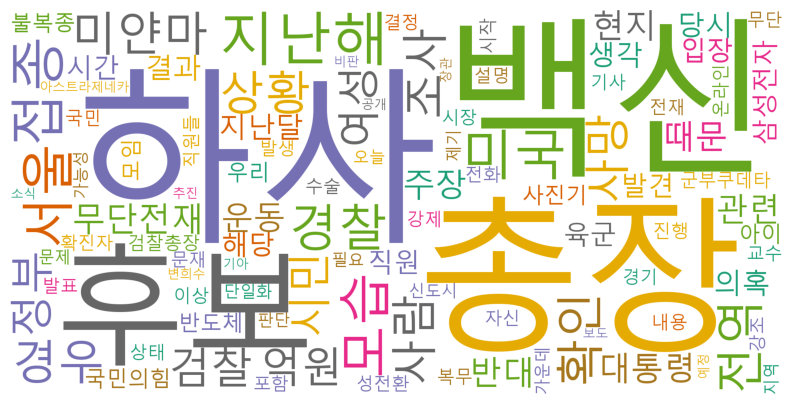

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(top_keywords)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off') #off 가능
plt.imshow(wc)

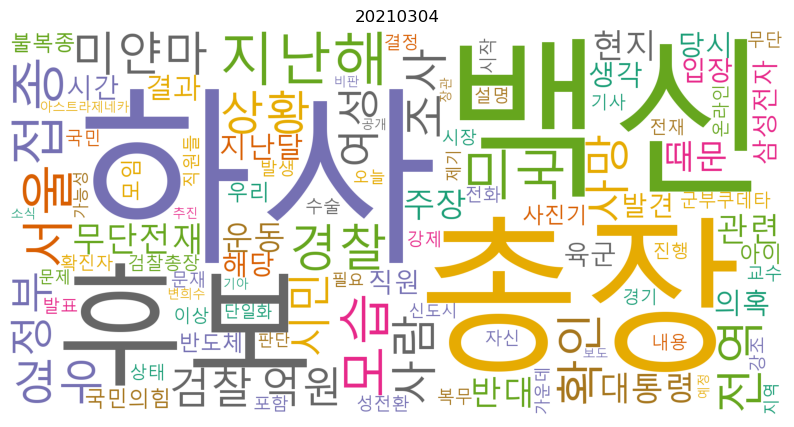

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(top_keywords)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off') #off 가능
plt.title('20210304')
plt.imshow(wc)
plt.savefig('D:/marketing/wc/test1.png')